In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from HuobiAPI import *
from __future__ import print_function
import numpy as np
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (20,10)
figsize=(18, 10)

In [4]:
symbols = get_symbols()
symbol_df = pd.DataFrame(symbols['data'])
symbol_df.head()

amount-precision base-currency  price-precision quote-currency   symbol  \
0                 4           btc                2           usdt  btcusdt   
1                 4           bch                2           usdt  bchusdt   
2                 4           eth                2           usdt  ethusdt   
3                 4           etc                4           usdt  etcusdt   
4                 4           ltc                2           usdt  ltcusdt   

  symbol-partition  
0             main  
1             main  
2             main  
3             main  
4             main

In [12]:
grouped = symbol_df.groupby(['quote-currency'])

In [14]:
usdt_grp = grouped.get_group('usdt')
usdt_grp.head()

amount-precision base-currency  price-precision quote-currency   symbol  \
0                 4           btc                2           usdt  btcusdt   
1                 4           bch                2           usdt  bchusdt   
2                 4           eth                2           usdt  ethusdt   
3                 4           etc                4           usdt  etcusdt   
4                 4           ltc                2           usdt  ltcusdt   

  symbol-partition  
0             main  
1             main  
2             main  
3             main  
4             main

In [15]:
btc_grp = grouped.get_group('btc')
btc_grp.head()

amount-precision base-currency  price-precision quote-currency  symbol  \
43                 4           xmr                6            btc  xmrbtc   
44                 4           bch                6            btc  bchbtc   
45                 4           eth                6            btc  ethbtc   
46                 4           ltc                6            btc  ltcbtc   
47                 4           etc                6            btc  etcbtc   

   symbol-partition  
43             main  
44             main  
45             main  
46             main  
47             main

In [16]:
eth_grp = grouped.get_group('eth')
eth_grp.head()

amount-precision base-currency  price-precision quote-currency   symbol  \
153                 4           xmr                6            eth   xmreth   
154                 2           eos                8            eth   eoseth   
155                 4           omg                6            eth   omgeth   
156                 4          iota                6            eth  iotaeth   
157                 4           ada                6            eth   adaeth   

    symbol-partition  
153             main  
154             main  
155             main  
156             main  
157             main

In [118]:
def last_price_triangle_arbitrage(period, equity,
                                  base_currency="btc",
                                  quote_currency="usdt",
                                  middle_currency="eos"):
    commission = 0.002
    base_quote = base_currency+quote_currency
    base_quote_kline = get_kline(base_quote, period, 1)
    base_quote_last_price = base_quote_kline['data'][0]['close']
    
    middle_base = middle_currency+base_currency
    middle_base_kline = get_kline(middle_base, period, 1)
    middle_base_last_price = middle_base_kline['data'][0]['close']
    
    middle_quote = middle_currency+quote_currency
    middle_quote_kline = get_kline(middle_quote, period, 1)
    middle_quote_last_price = middle_quote_kline['data'][0]['close']
    
    result = equity*(1-commission)/base_quote_last_price*(1-commission)/middle_base_last_price*(1-commission)*middle_quote_last_price
    return round(result, 3)

In [131]:
last_price_triangle_arbitrage('1min', 10000, middle_currency='dta')

TypeError: 'NoneType' object is not subscriptable

In [124]:
def get_ready(period, size,
              base_currency="btc",
              quote_currency="usdt",
              middle_currency="eos"):
    base_quote = base_currency+quote_currency
    middle_base = middle_currency+base_currency
    middle_quote = middle_currency+quote_currency
    print("base_quote: {0}, middle_base: {1}, middle_quote: {2}".format(base_quote, middle_base, middle_quote))
    first = get_kline_df(base_quote, period, size)
    second = get_kline_df(middle_base, period, size)
    third = get_kline_df(middle_quote, period, size)
    
    first[base_quote] = first.close
    first[middle_base] = second.close
    first[middle_quote] = third.close
    first['arbitrage'] = 1/first[base_quote]/first[middle_base]*first[middle_quote]*(0.998**3)

    return first, second, third

def triangle_arbitrage(first, second, third):
    commission = 0.002
    
    first['diff'] = first['arbitrage'] - 1
    first['diff_rate'] = first['diff'] / 1
    first['arbitrage'].plot()
    plt.show()
    return first

In [127]:
def calculate():
    middle_btc_bases = btc_grp['base-currency'].values
    middle_eth_bases = eth_grp['base-currency'].values
    for index, row in usdt_grp.iterrows():
        base = row['base-currency']
        if base != 'btc' and base != 'usdt':
            if base in middle_eth_bases:
                first, second, third = get_ready('1min', 2000,
                                                 base_currency='btc', quote_currency='usdt', middle_currency=base)
                triangle_arbitrage(first, second, third)
#             if base in middle_eth_bases:
#                 first, second, third = get_ready('1min', 2000, base_currency='eth', middle_currency=base)
#                 triangle_arbitrage(first, second, third)

base_quote: btcusdt, middle_base: eosbtc, middle_quote: eosusdt


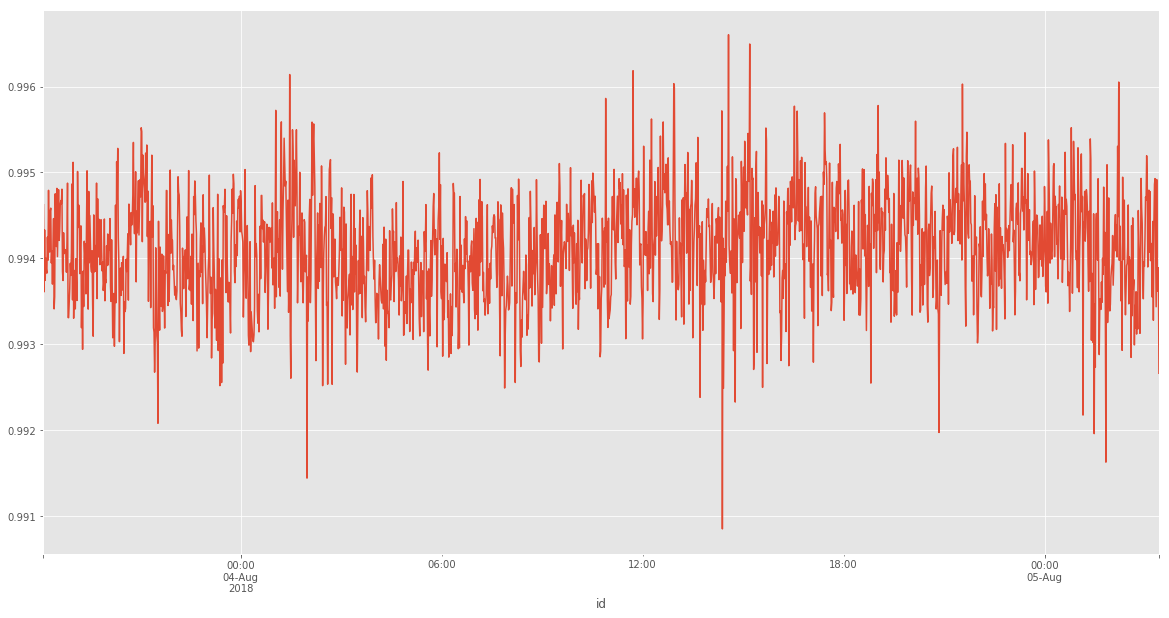

base_quote: btcusdt, middle_base: omgbtc, middle_quote: omgusdt


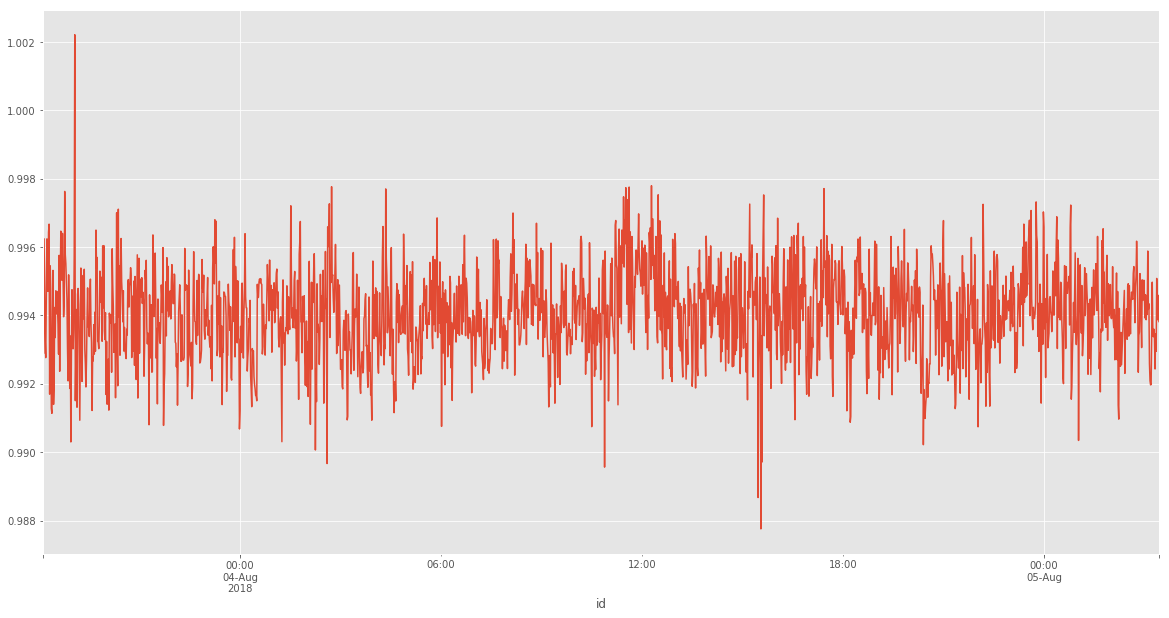

base_quote: btcusdt, middle_base: adabtc, middle_quote: adausdt


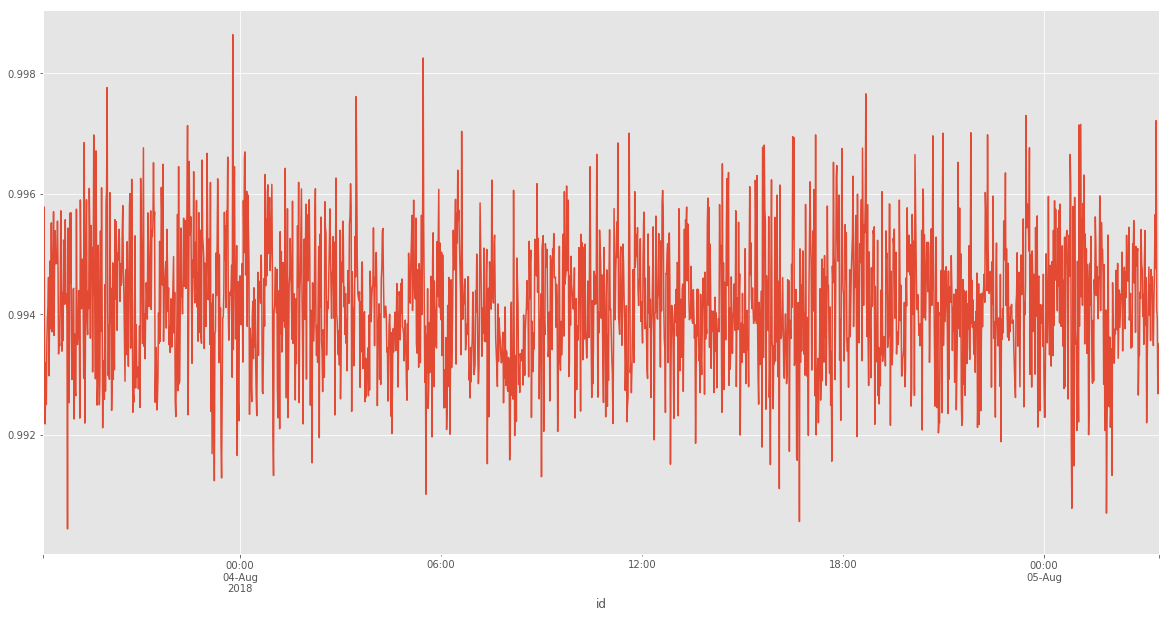

base_quote: btcusdt, middle_base: steembtc, middle_quote: steemusdt


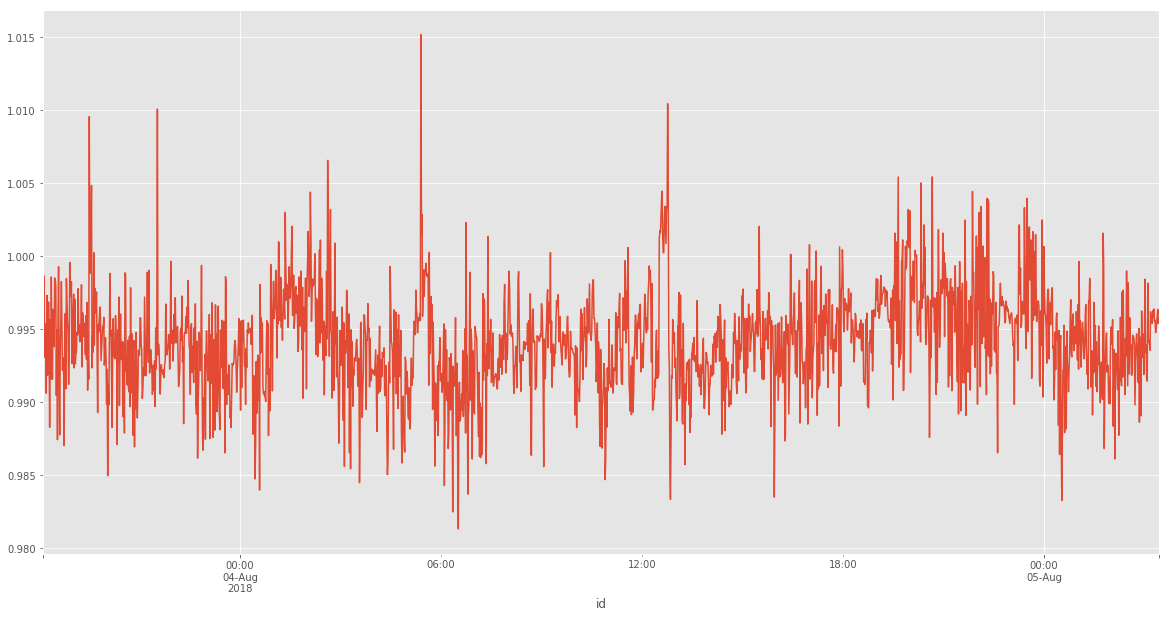

base_quote: btcusdt, middle_base: iotabtc, middle_quote: iotausdt


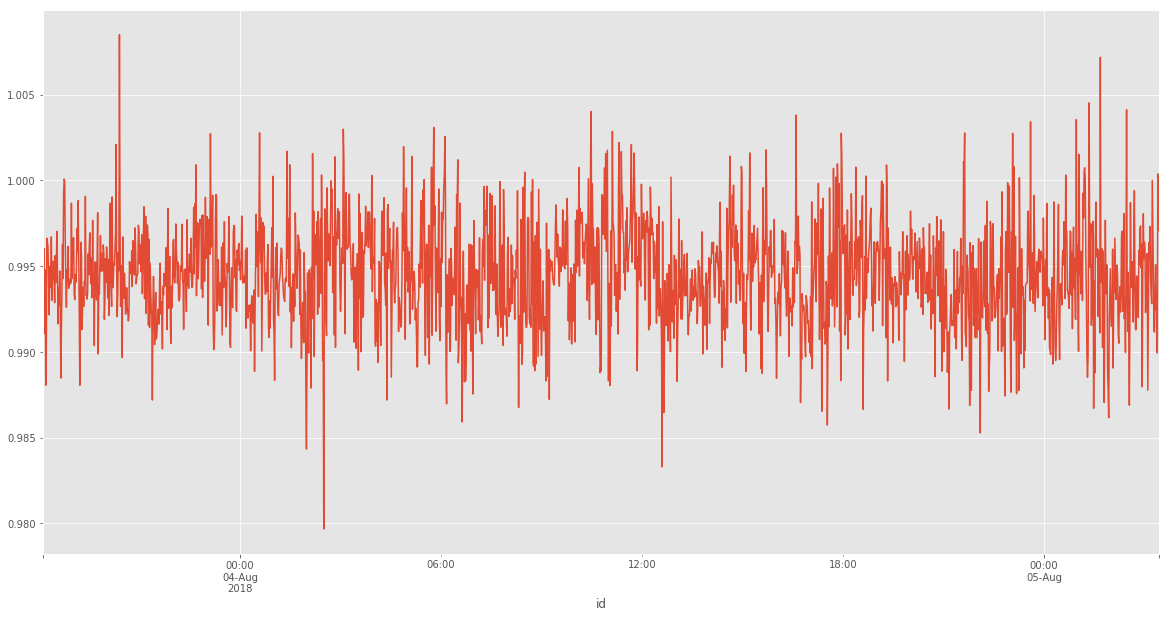

base_quote: btcusdt, middle_base: ocnbtc, middle_quote: ocnusdt


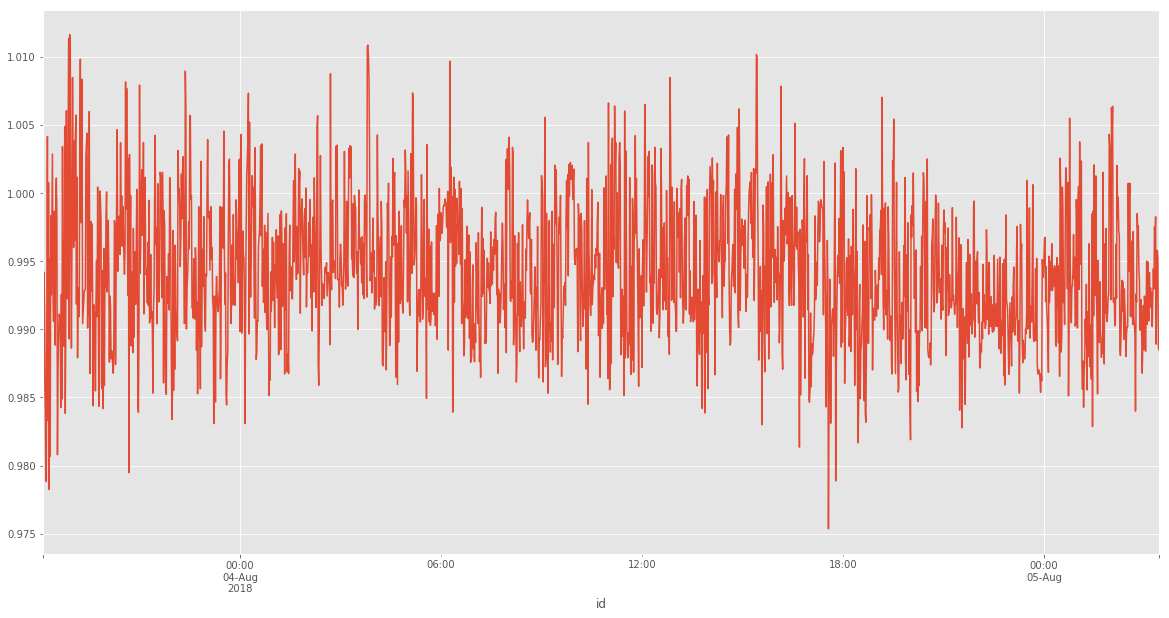

base_quote: btcusdt, middle_base: socbtc, middle_quote: socusdt


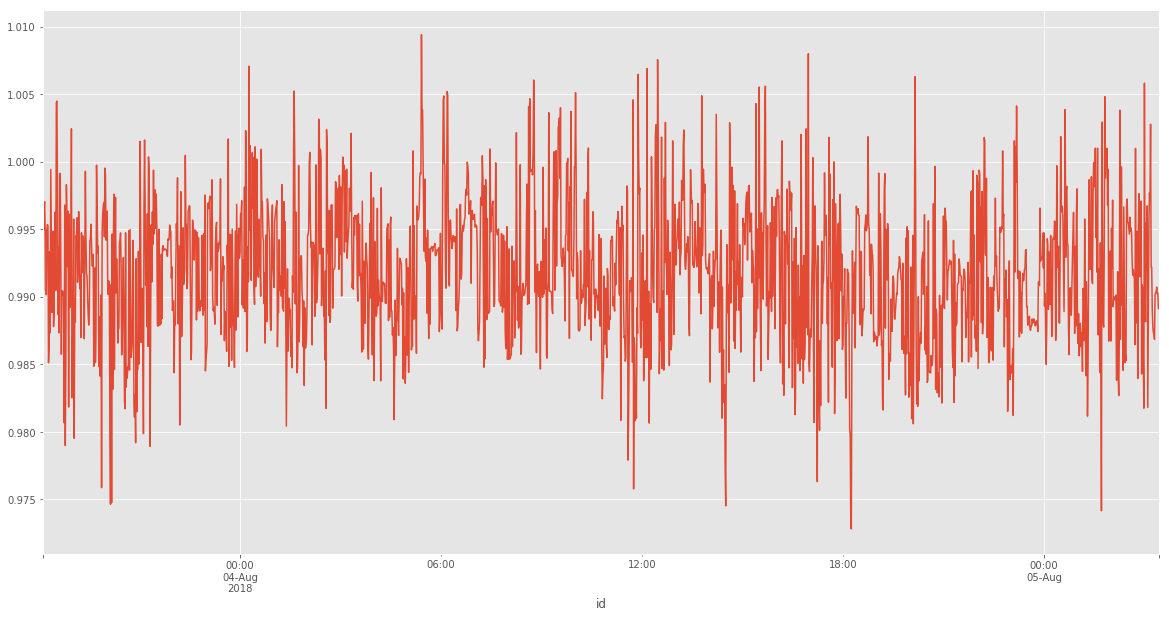

base_quote: btcusdt, middle_base: ctxcbtc, middle_quote: ctxcusdt


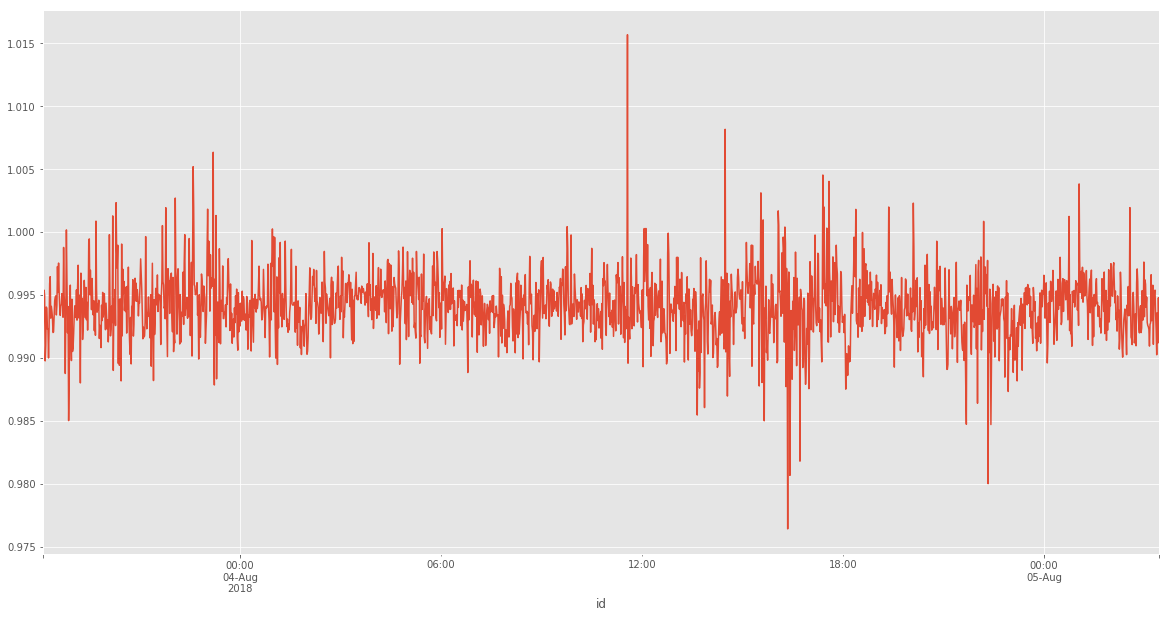

base_quote: btcusdt, middle_base: actbtc, middle_quote: actusdt


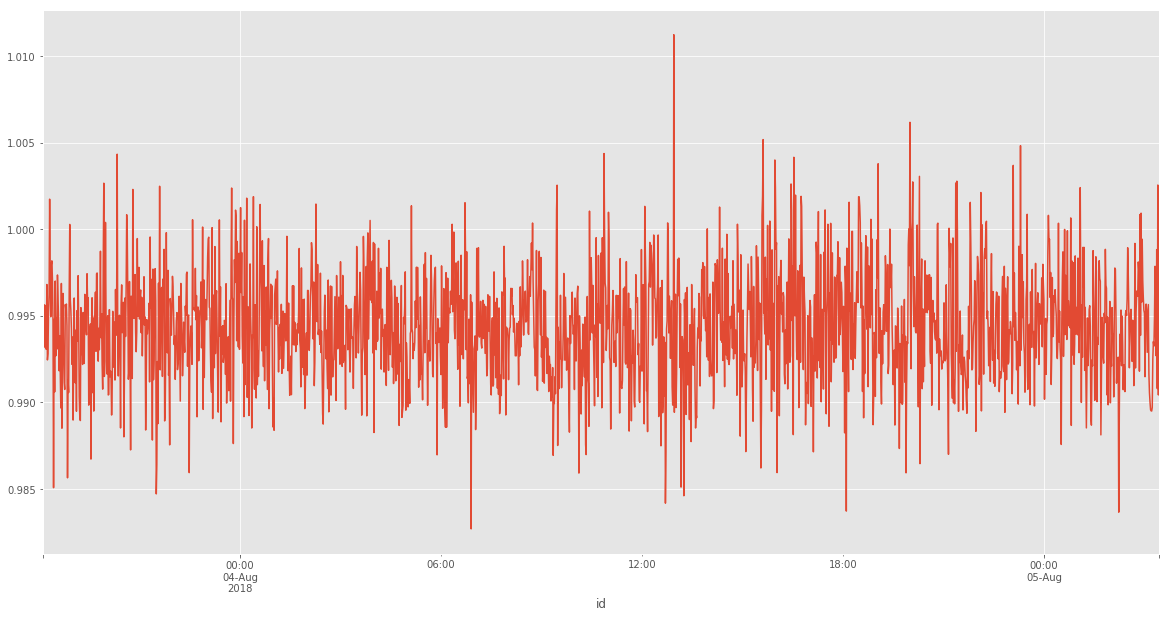

base_quote: btcusdt, middle_base: btmbtc, middle_quote: btmusdt


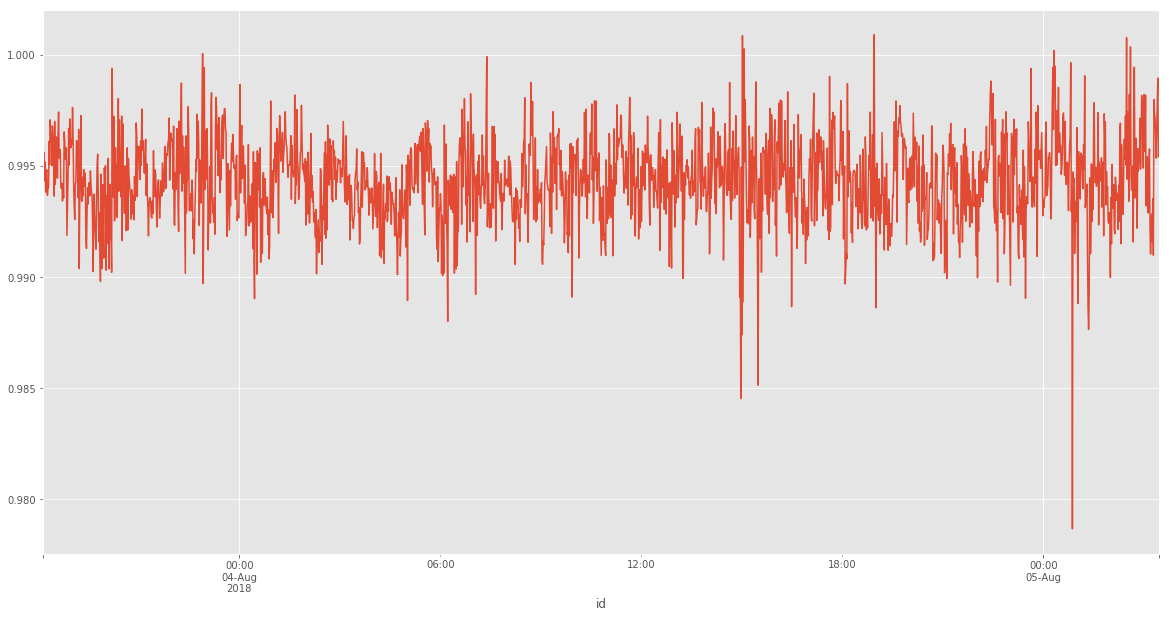

base_quote: btcusdt, middle_base: btsbtc, middle_quote: btsusdt


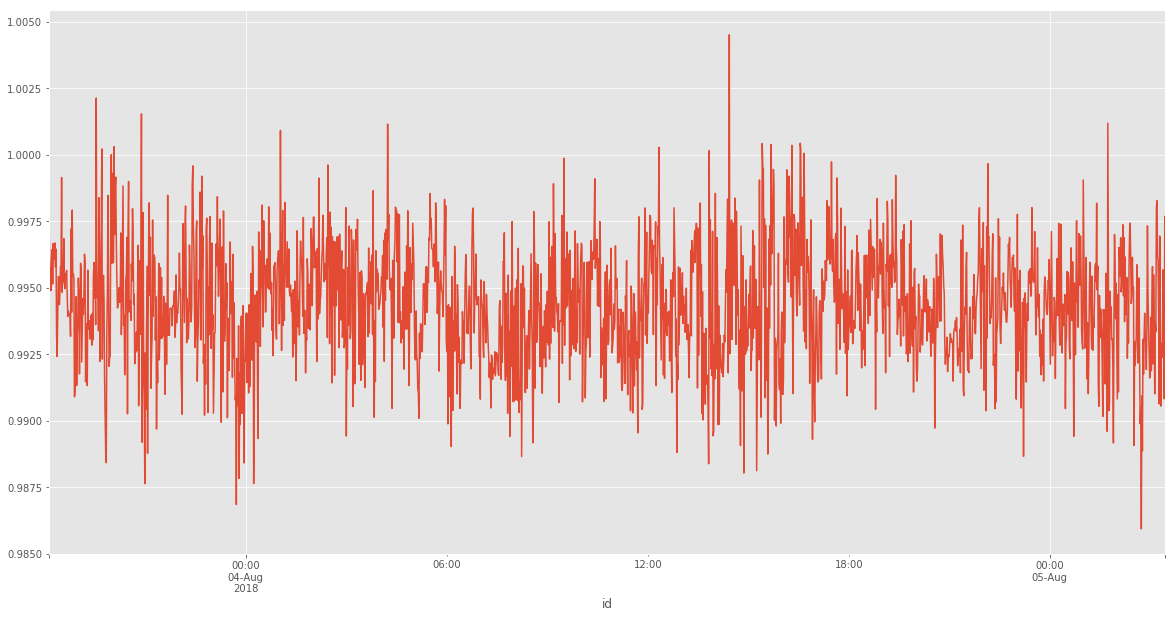

base_quote: btcusdt, middle_base: ontbtc, middle_quote: ontusdt


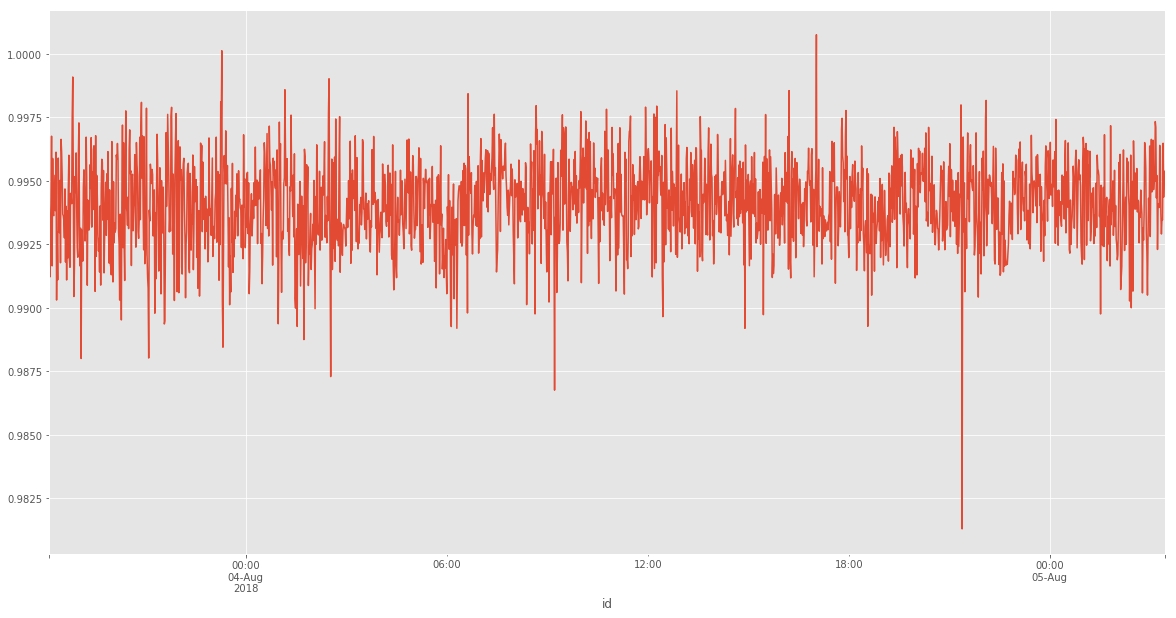

base_quote: btcusdt, middle_base: iostbtc, middle_quote: iostusdt


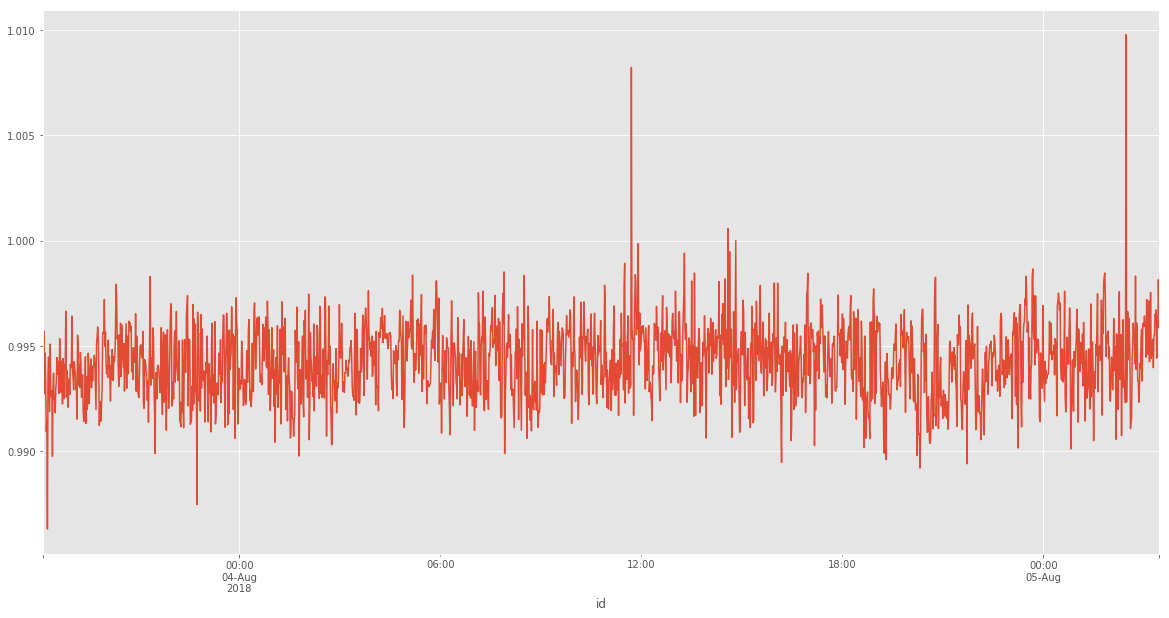

base_quote: btcusdt, middle_base: htbtc, middle_quote: htusdt


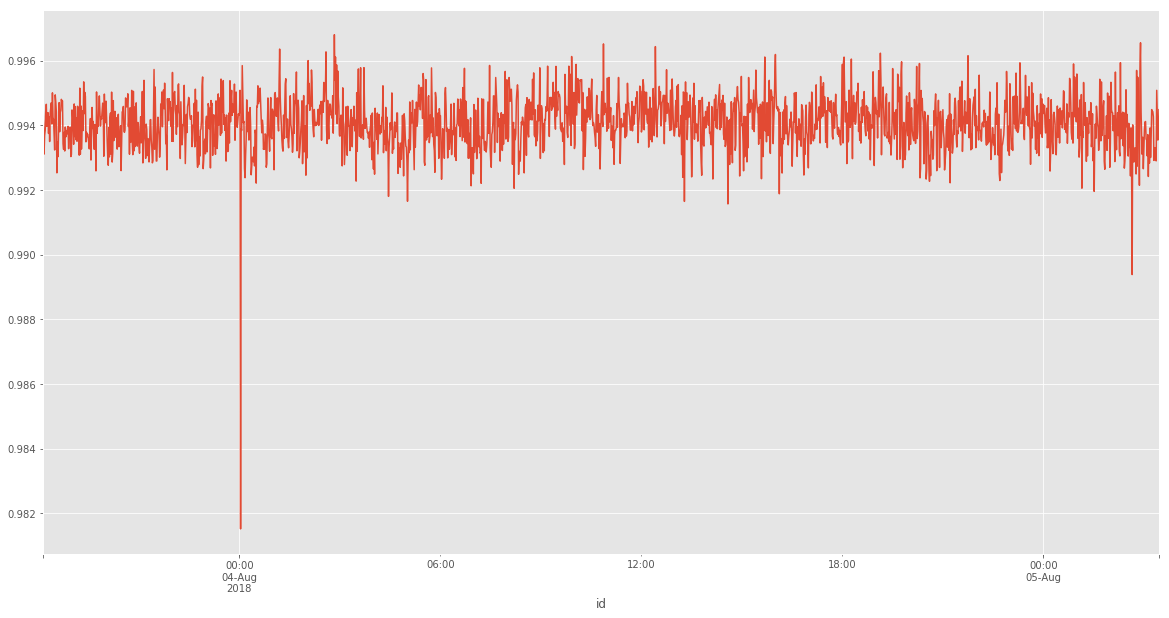

base_quote: btcusdt, middle_base: trxbtc, middle_quote: trxusdt


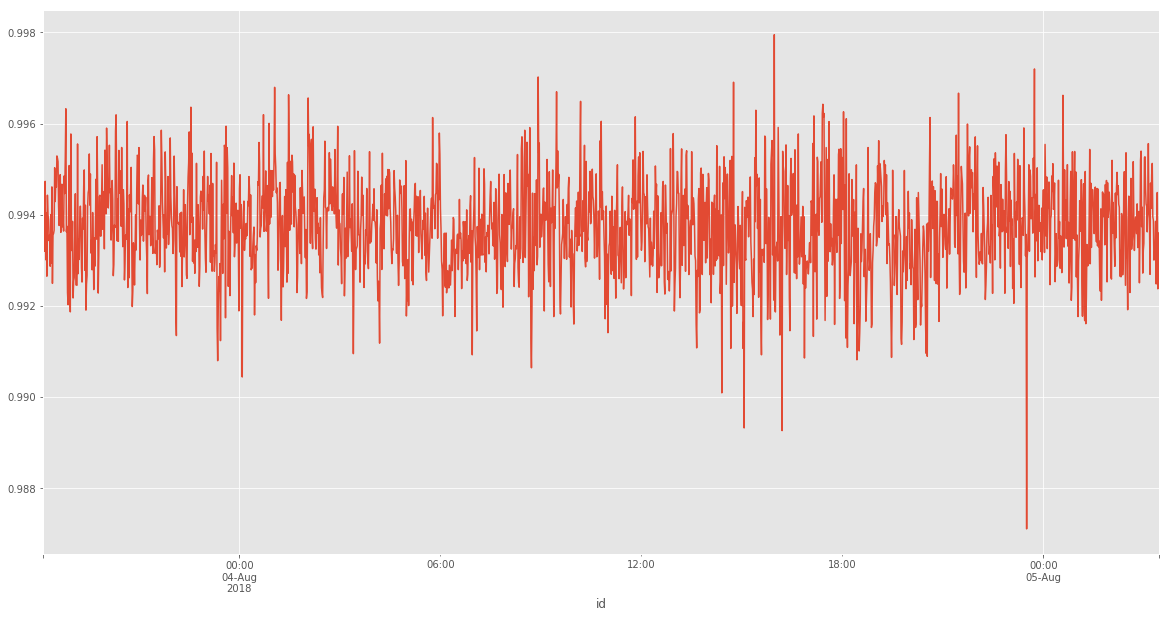

base_quote: btcusdt, middle_base: dtabtc, middle_quote: dtausdt


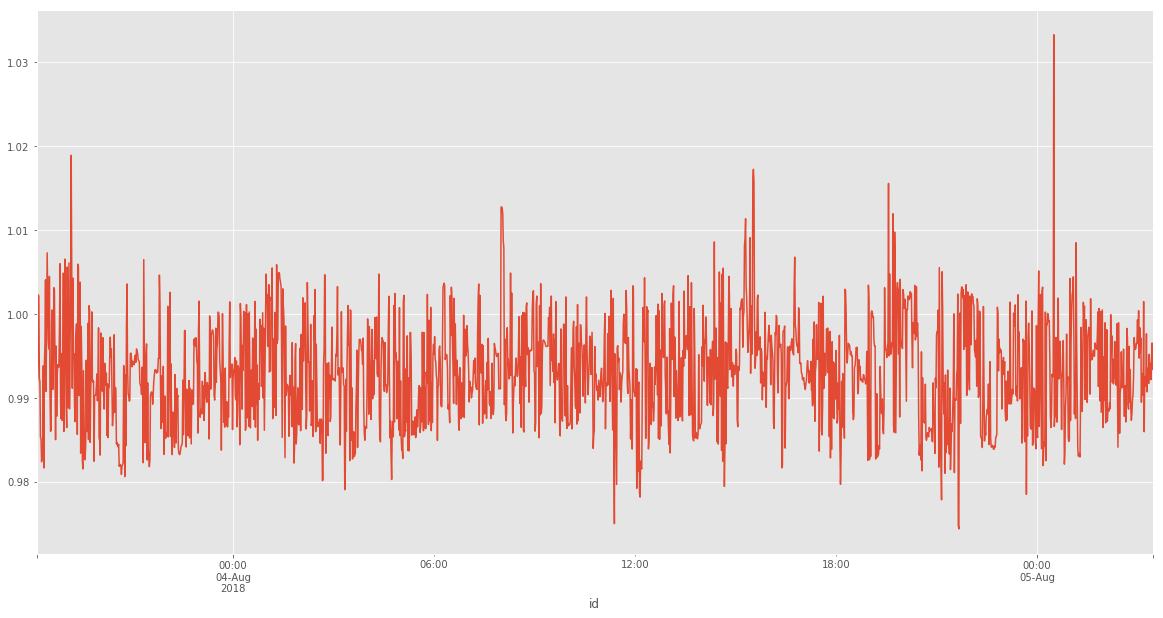

base_quote: btcusdt, middle_base: qtumbtc, middle_quote: qtumusdt


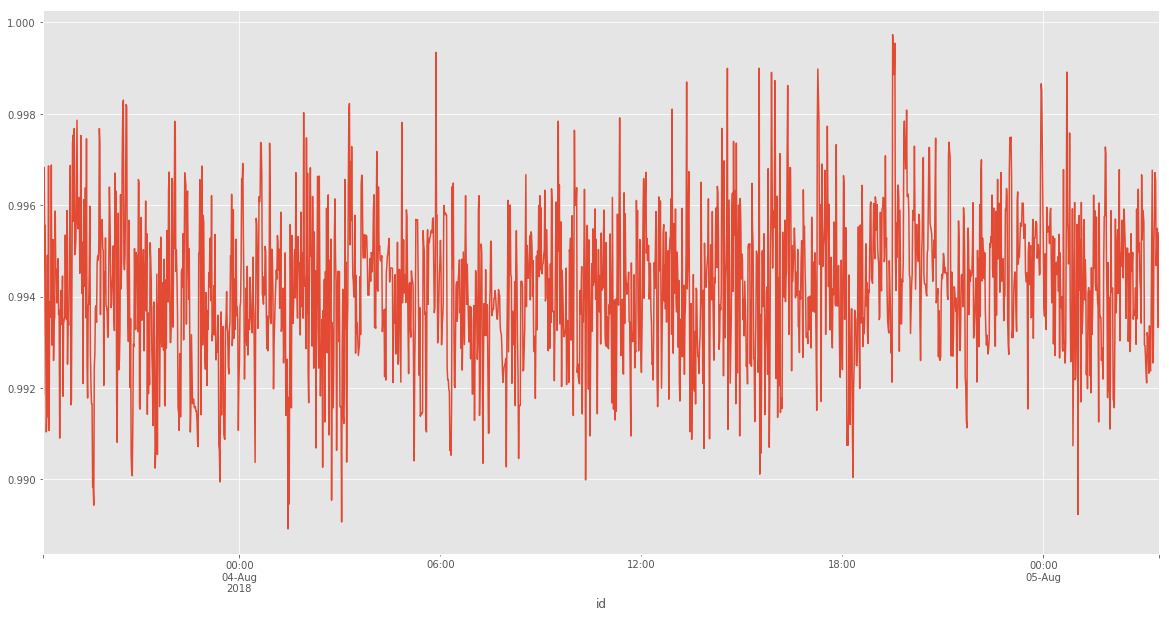

base_quote: btcusdt, middle_base: smtbtc, middle_quote: smtusdt


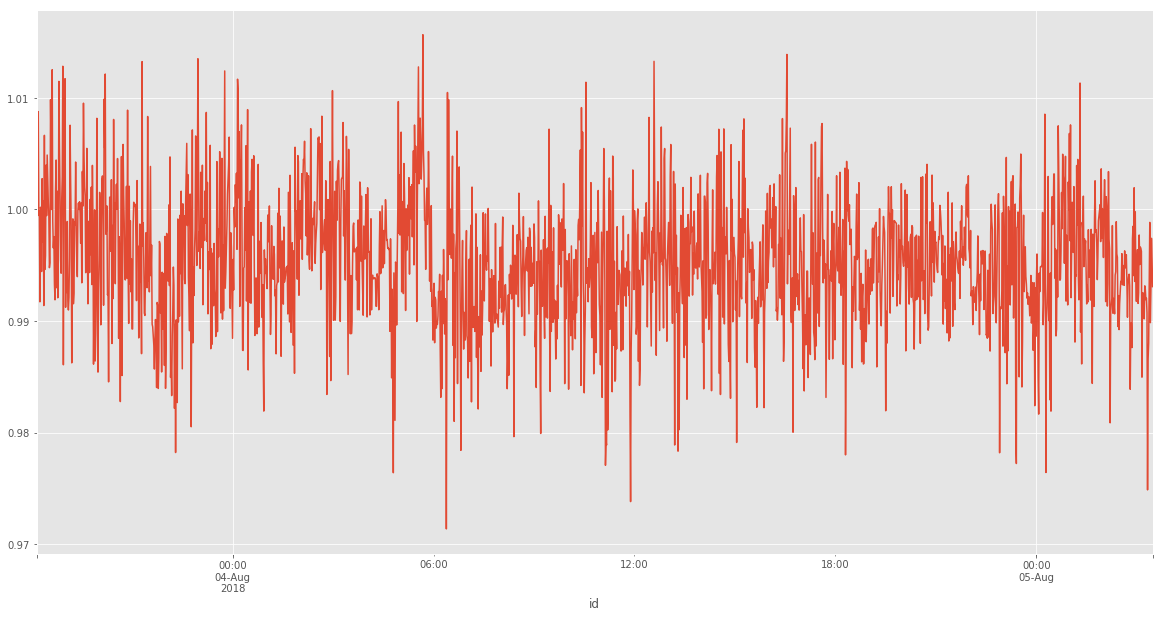

base_quote: btcusdt, middle_base: elabtc, middle_quote: elausdt


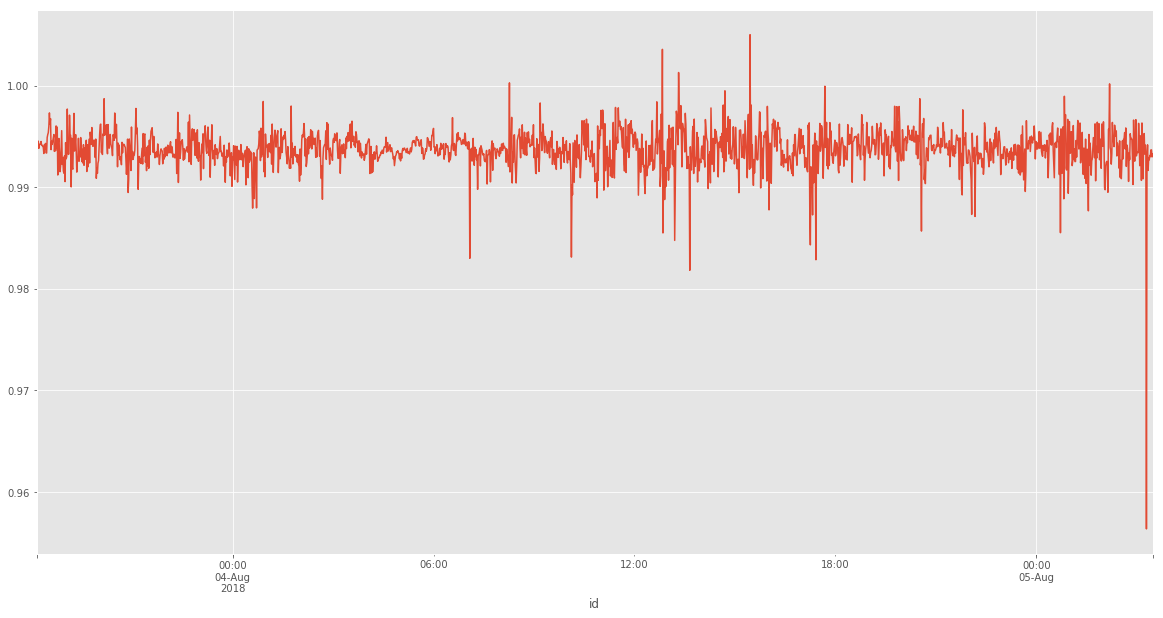

base_quote: btcusdt, middle_base: venbtc, middle_quote: venusdt


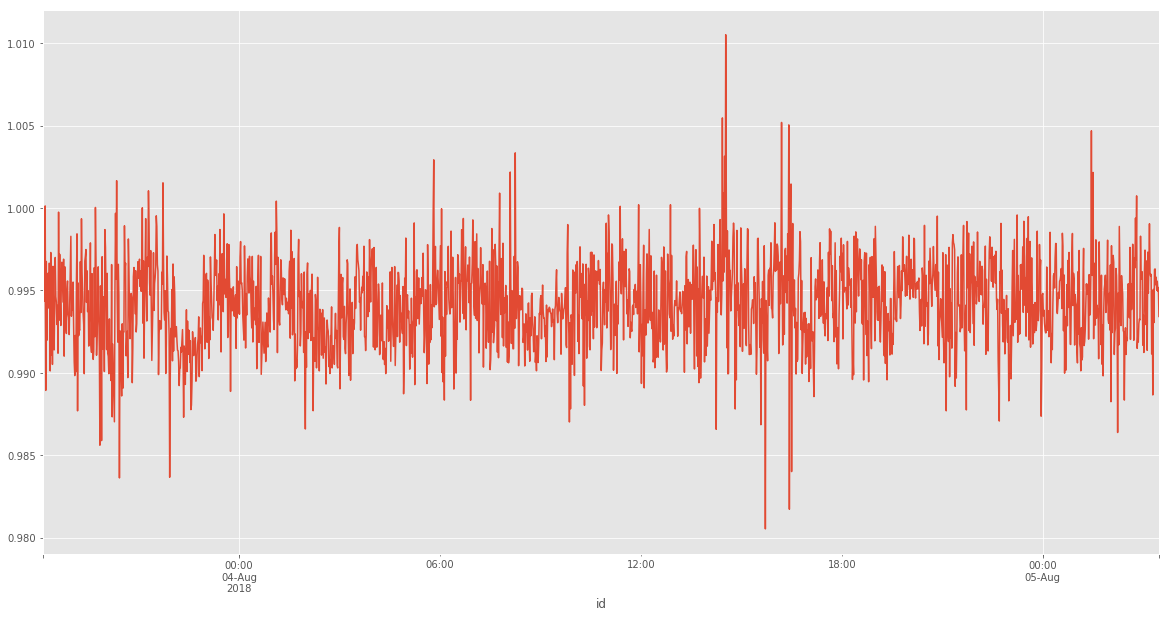

base_quote: btcusdt, middle_base: thetabtc, middle_quote: thetausdt


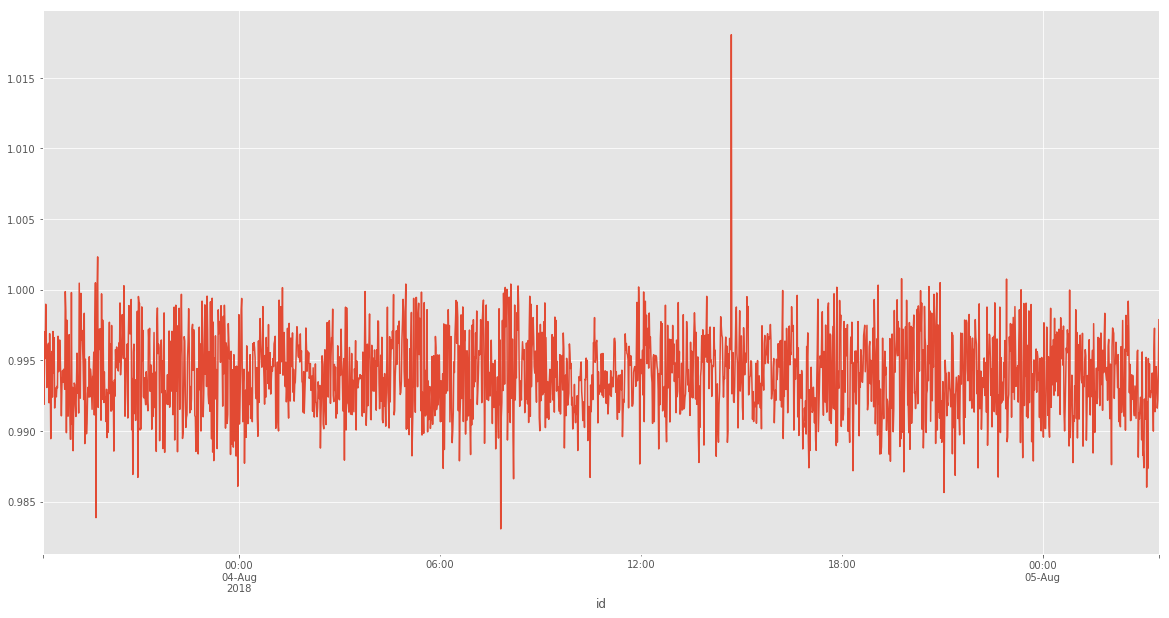

base_quote: btcusdt, middle_base: zilbtc, middle_quote: zilusdt


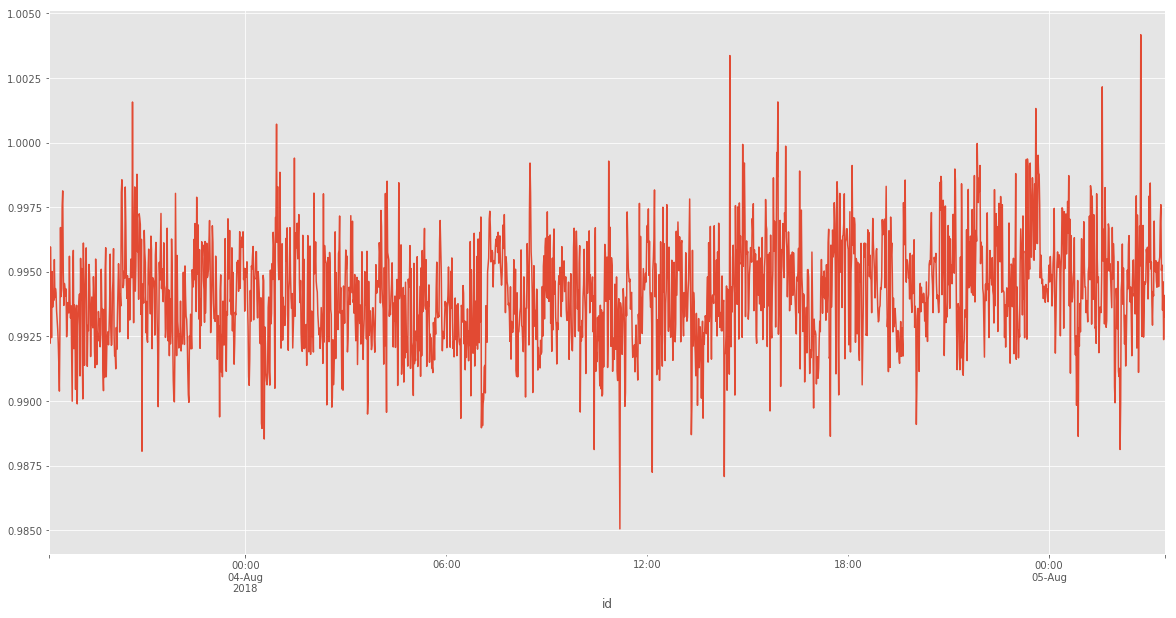

base_quote: btcusdt, middle_base: nasbtc, middle_quote: nasusdt


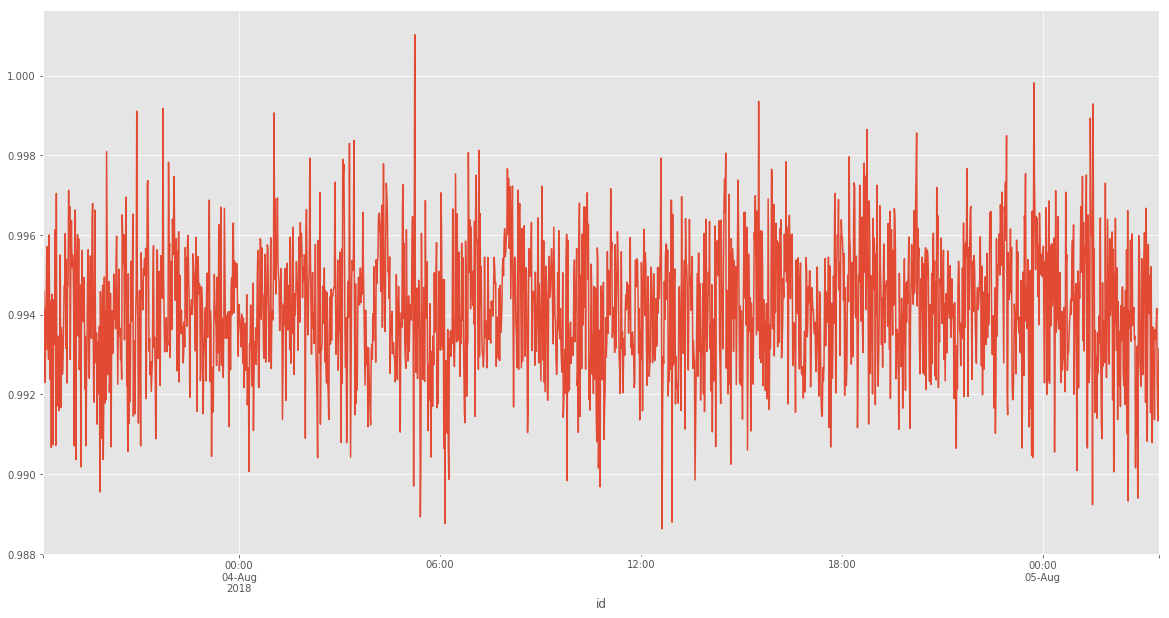

base_quote: btcusdt, middle_base: ruffbtc, middle_quote: ruffusdt


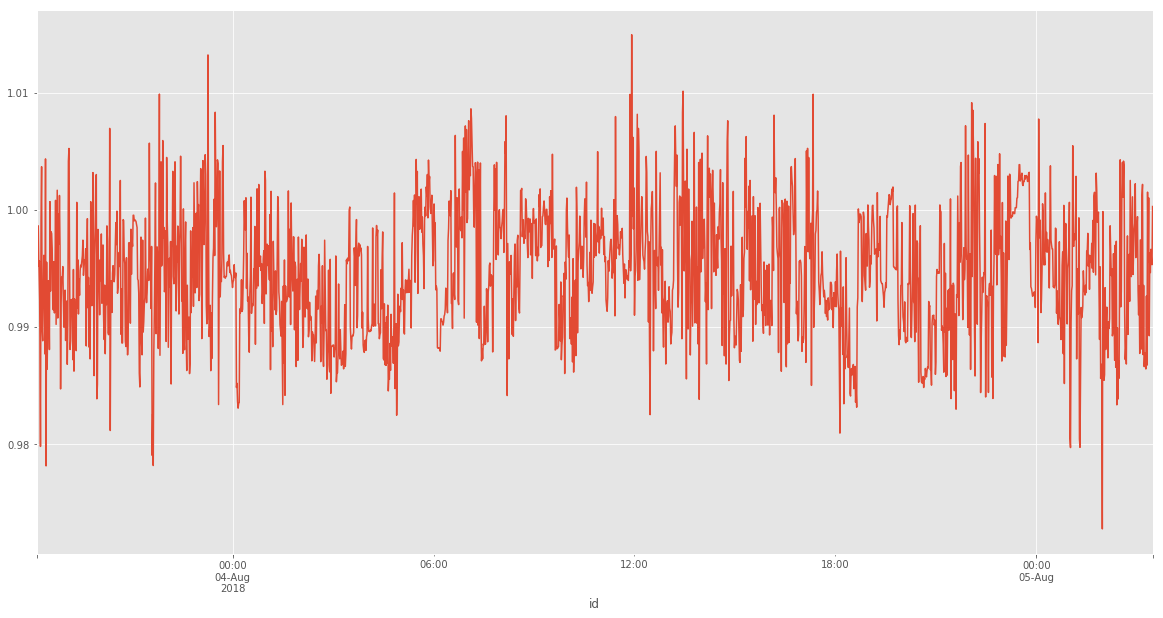

base_quote: btcusdt, middle_base: hsrbtc, middle_quote: hsrusdt


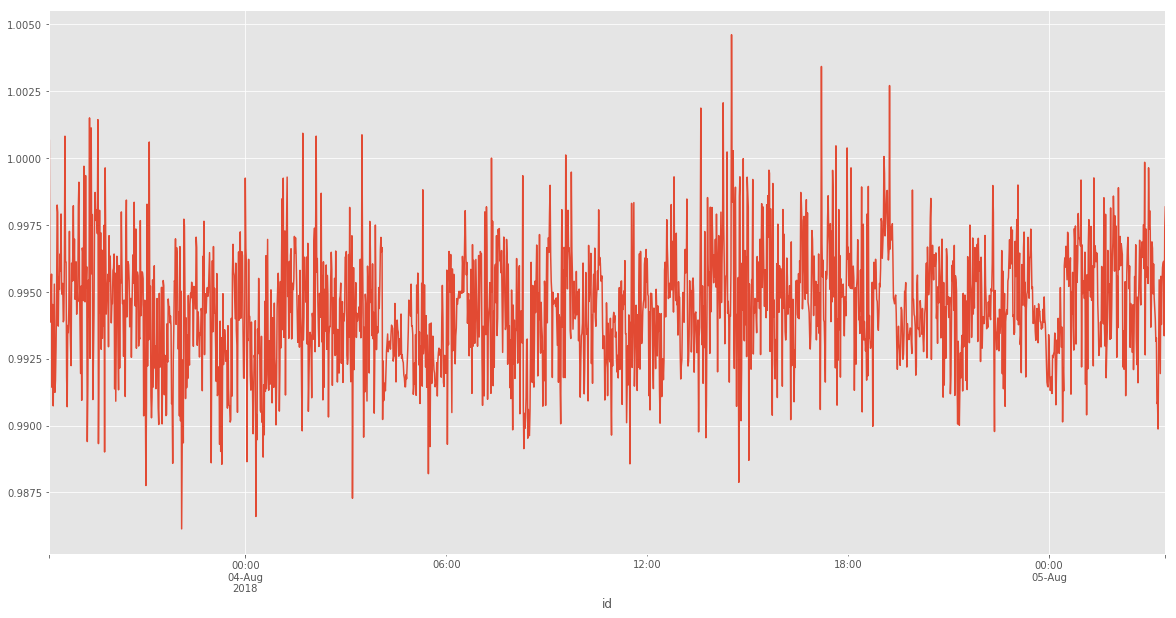

base_quote: btcusdt, middle_base: letbtc, middle_quote: letusdt


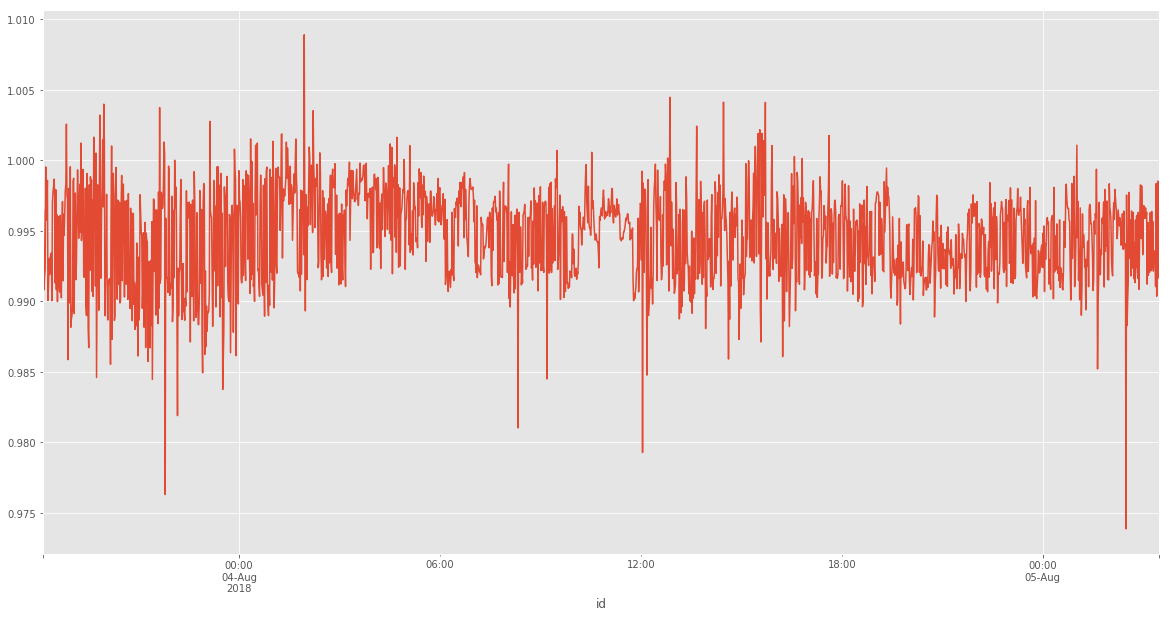

base_quote: btcusdt, middle_base: mdsbtc, middle_quote: mdsusdt


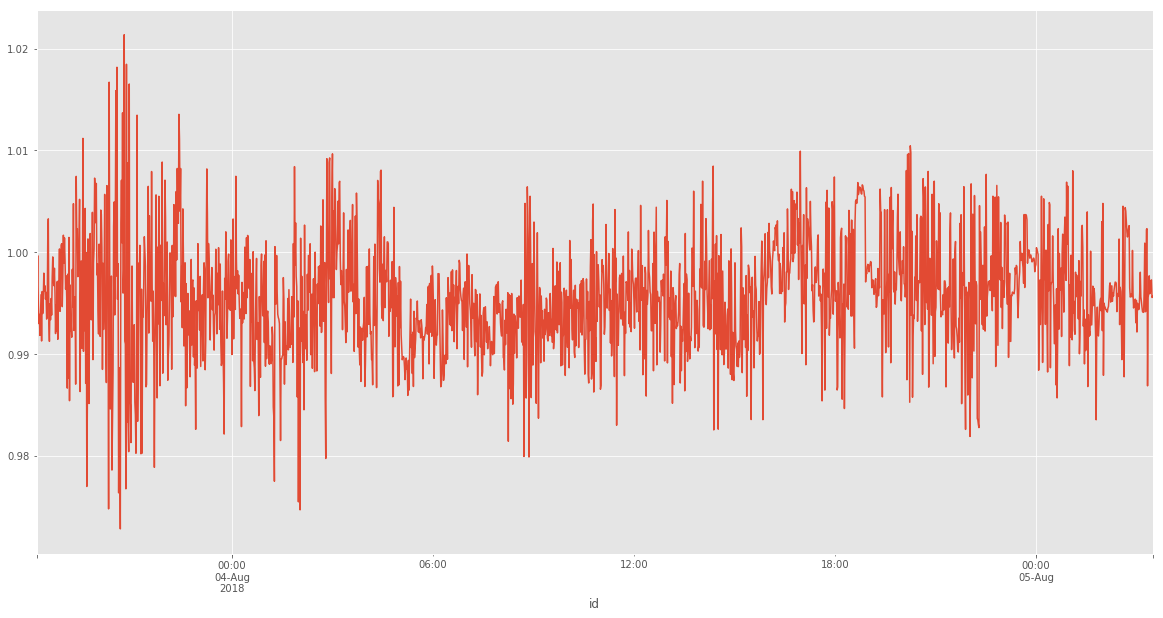

base_quote: btcusdt, middle_base: elfbtc, middle_quote: elfusdt


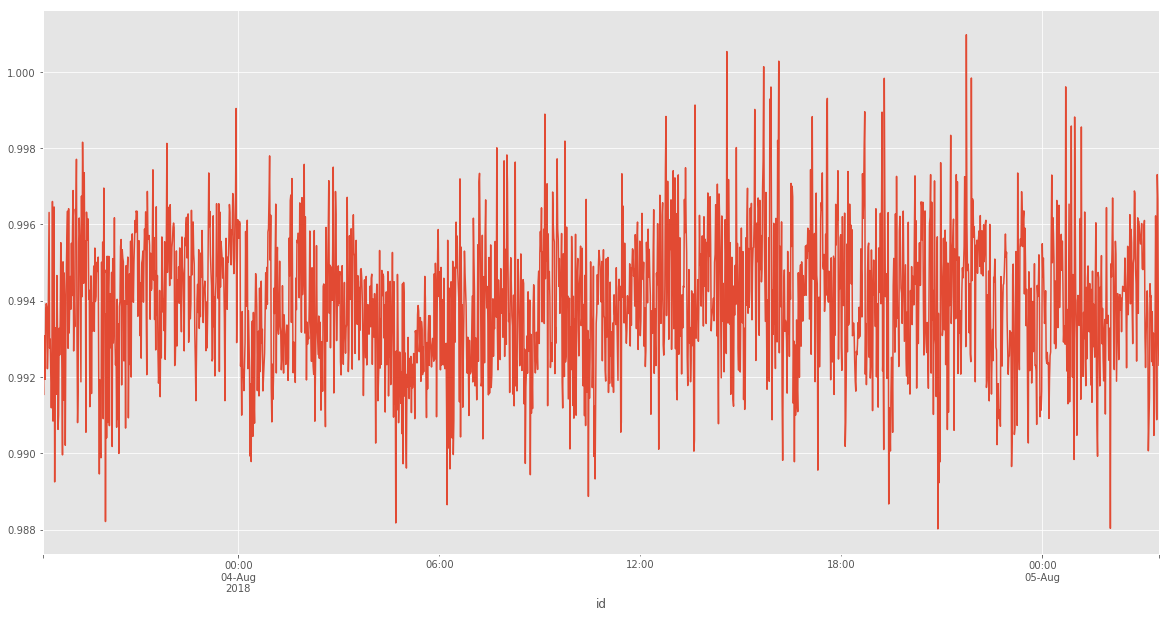

base_quote: btcusdt, middle_base: itcbtc, middle_quote: itcusdt


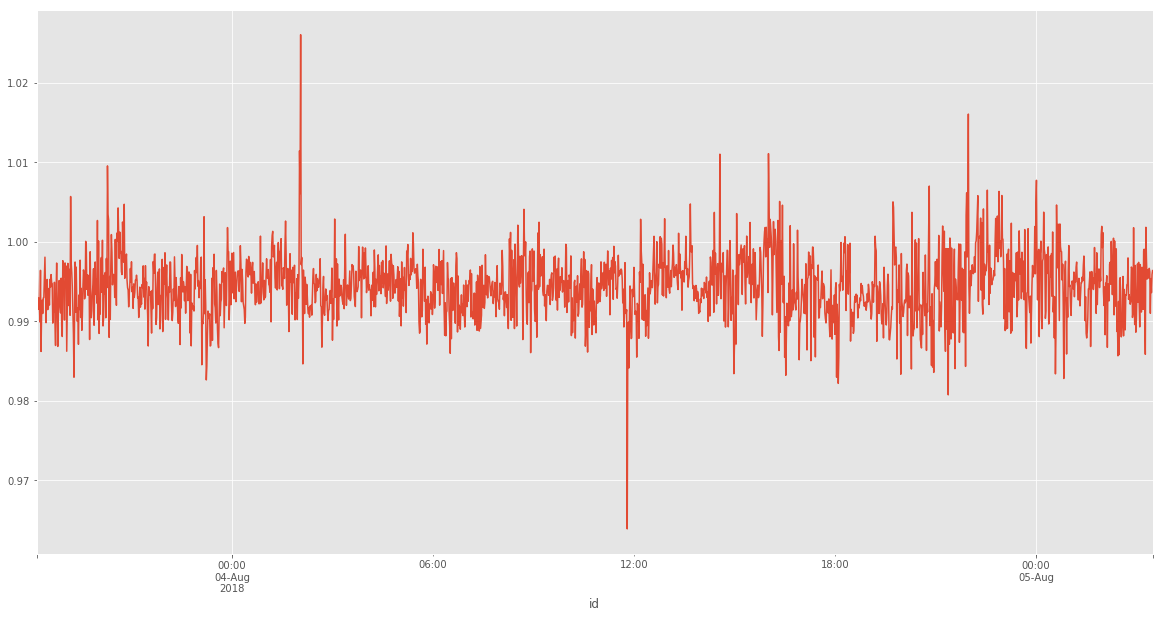

base_quote: btcusdt, middle_base: cvcbtc, middle_quote: cvcusdt


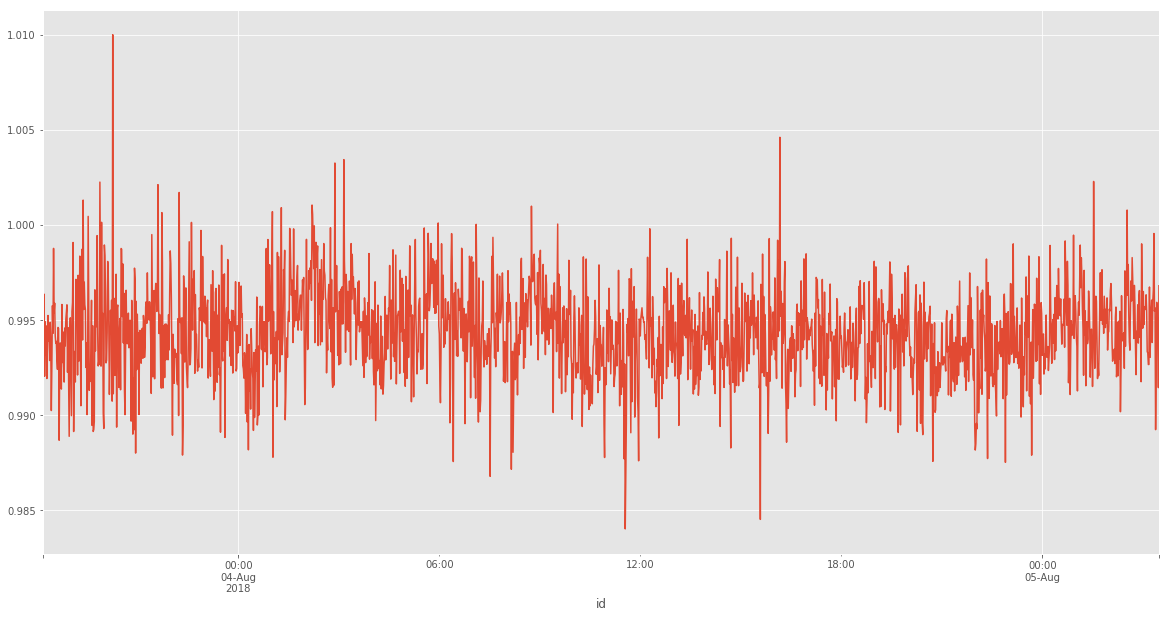

base_quote: btcusdt, middle_base: gntbtc, middle_quote: gntusdt


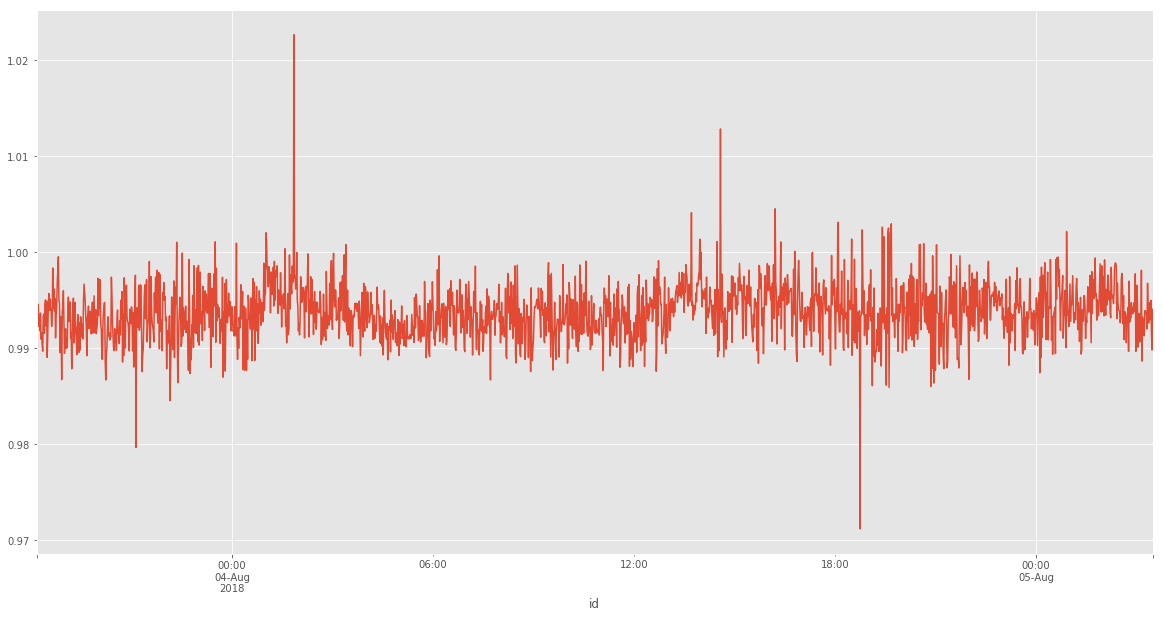

base_quote: btcusdt, middle_base: wiccbtc, middle_quote: wiccusdt


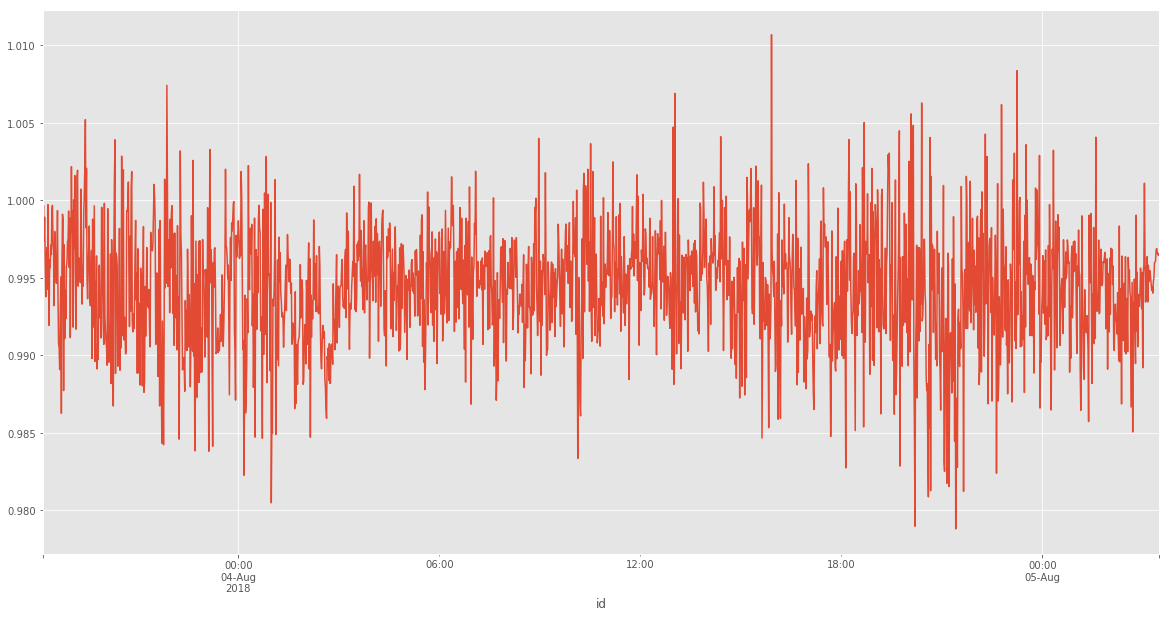

base_quote: btcusdt, middle_base: cmtbtc, middle_quote: cmtusdt


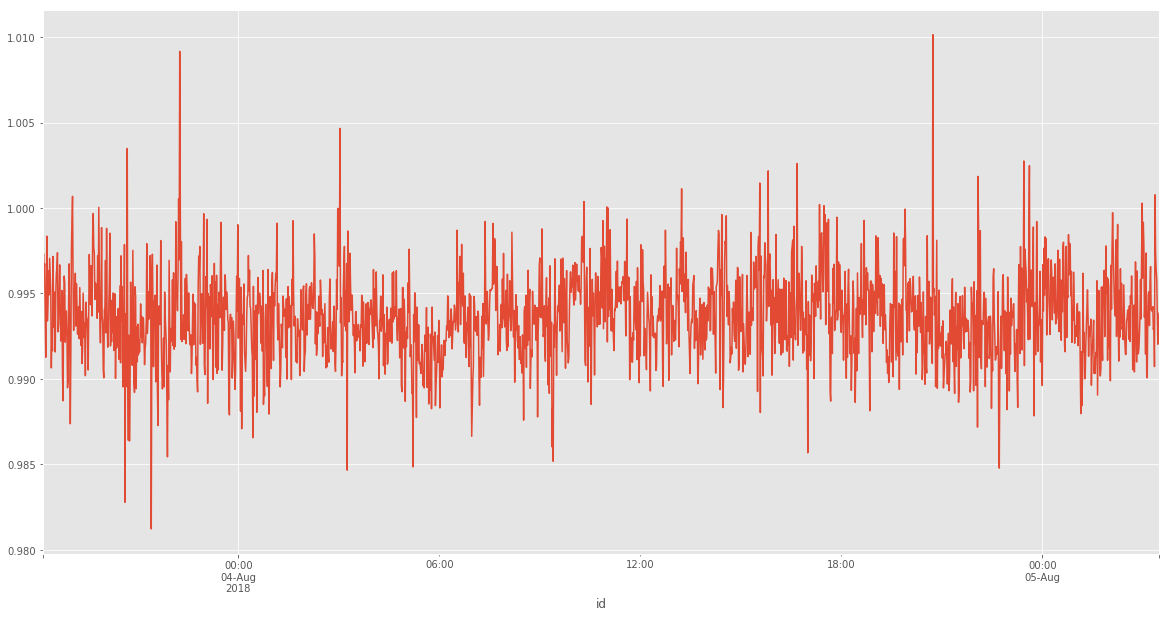

base_quote: btcusdt, middle_base: bixbtc, middle_quote: bixusdt


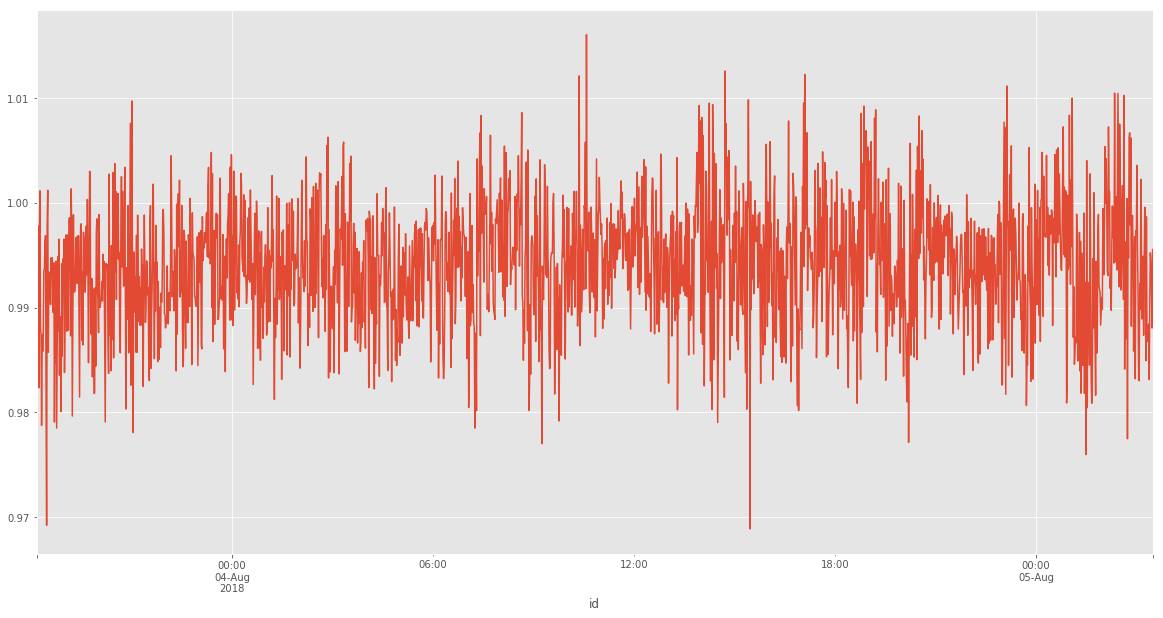

In [128]:
calculate()

In [102]:
import urllib.request
import json
import random
import os
import socket
import datetime

socket.setdefaulttimeout(5)

url = 'https://api.binance.com//api/v3/ticker/price'
response = urllib.request.urlopen(url)
page = response.read()
allcoins = json.loads(page)

In [114]:
btc_coin = dict()
eth_coin = dict()
for item in allcoins:
    coin = item['symbol'][:-3]
    quote = item['symbol'][-3:]
    if quote == 'BTC':
        btc_coin[coin] = item
    elif quote == 'ETH':
        eth_coin[coin] = item

In [117]:
print("coin----ETH price-------ETH/BTC price----to BTC price----direct BTC price------diff rate")
for k, v in btc_coin.items():
    if k in eth_coin:
        ethprice = float(btc_coin['ETH']["price"])
        eth_quote = float(eth_coin[k]['price'])
        coin2btc = ethprice * eth_quote
        btcbuy = float(btc_coin[k]['price'])
        profit= round((btcbuy - coin2btc)*1000/coin2btc, 2)
        print("%s\t%10.8f\t%10.8f\t %10.8f\t %10.8f\t %3.4f" % (k, eth_quote, ethprice, coin2btc, btcbuy, profit))

coin----ETH price-------ETH/BTC price----to BTC price----direct BTC price------diff rate
LTC	0.17989000	0.05825200	 0.01047895	 0.01048200	 0.2900
BNB	0.03378400	0.05825200	 0.00196799	 0.00196920	 0.6200
NEO	0.06569200	0.05825200	 0.00382669	 0.00381900	 -2.0100
BCC	1.70910000	0.05825200	 0.09955849	 0.09984100	 2.8400
HSR	0.01189000	0.05825200	 0.00069262	 0.00069300	 0.5500
MCO	0.01545600	0.05825200	 0.00090034	 0.00089500	 -5.9300
WTC	0.00869800	0.05825200	 0.00050668	 0.00050760	 1.8200
LRC	0.00040788	0.05825200	 0.00002376	 0.00002374	 -0.8300
QTUM	0.01535400	0.05825200	 0.00089440	 0.00089600	 1.7900
YOYO	0.00007651	0.05825200	 0.00000446	 0.00000445	 -1.5400
OMG	0.01323600	0.05825200	 0.00077102	 0.00076800	 -3.9200
ZRX	0.00227370	0.05825200	 0.00013245	 0.00013219	 -1.9400
STRAT	0.00484500	0.05825200	 0.00028223	 0.00028280	 2.0200
SNGLS	0.00006860	0.05825200	 0.00000400	 0.00000400	 0.9800
BQX	0.00160980	0.05825200	 0.00009377	 0.00009376	 -0.1500
KNC	0.00169950	0.05825200	 0

In [9]:
symbol_df.head()

amount-precision base-currency  price-precision quote-currency   symbol  \
0                 4           btc                2           usdt  btcusdt   
1                 4           bch                2           usdt  bchusdt   
2                 4           eth                2           usdt  ethusdt   
3                 4           etc                4           usdt  etcusdt   
4                 4           ltc                2           usdt  ltcusdt   

  symbol-partition  
0             main  
1             main  
2             main  
3             main  
4             main

In [13]:
get_detail('veneth')

{'ch': 'market.veneth.detail',
 'status': 'ok',
 'tick': {'amount': 78285.53959142651,
  'close': 0.00284632,
  'count': 4029,
  'high': 0.00293222,
  'id': 16472583138,
  'low': 0.00270495,
  'open': 0.00275083,
  'version': 16472583138,
  'vol': 220.69236640208229},
 'ts': 1534407870086}

In [10]:
vols = []
for index, row in symbol_df.iterrows():
    s = row['symbol']
    detail = get_detail(s)['tick']
    vols.append(detail['vol'])

TypeError: 'NoneType' object is not subscriptable

In [11]:
vols

[175818222.49937424,
 56209689.53282363,
 122926144.82497704,
 33812364.751300655,
 15346829.593042508,
 97515507.05556443,
 25591102.64100962,
 15021606.327711288,
 3797879.597847252,
 5920383.114426586,
 3227700.772533343,
 159293.54081069,
 660273.21054462,
 187014.47232227007,
 307730.53168672,
 951746.48479245,
 464757.71095975,
 1306318.59928368,
 444193.0232048291,
 6122766.258681313,
 4230845.6386131495,
 8961135.973750569,
 10839560.21720586,
 272043.42479144066,
 1197882.2194452737,
 2065395.1500610793,
 322130.9876646679,
 971366.6188677674,
 523568.55378856,
 575950.19226276,
 361848.2043574862,
 1535037.08170185,
 219777.91274398,
 1114618.8184638205,
 440383.39205319114,
 638683.56121846,
 394179.55345991644,
 204594.31876592,
 114556.31185868,
 1411136.7330243,
 230251.05534518557,
 392175.549421,
 179629.8832036,
 29.88336988637017,
 7319.5686242217,
 6777.9449358587,
 1854.9274773885,
 1864.0927458035,
 8434.960821161454,
 115.2709637694,
 2999.3422526229365,
 580.5827

In [16]:
usdtQuoteDF = symbol_df[symbol_df['quote-currency'] == 'usdt']

In [17]:
vols = []
for index, row in usdtQuoteDF.iterrows():
    s = row['symbol']
    detail = get_detail(s)['tick']
    vols.append(detail['vol'])

In [18]:
usdtQuoteDF['vol'] = vols

/Users/magiclane/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [20]:
usdtQuoteDF.sort_values(by=['vol'], ascending=False, inplace=True)

/Users/magiclane/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [21]:
usdtQuoteDF

amount-precision base-currency  price-precision quote-currency  \
0                   4           btc                2           usdt   
2                   4           eth                2           usdt   
5                   4           eos                4           usdt   
1                   4           bch                2           usdt   
3                   4           etc                4           usdt   
6                   2           xrp                4           usdt   
4                   4           ltc                2           usdt   
7                   4           omg                4           usdt   
22                  2           trx                6           usdt   
21                  2            ht                4           usdt   
19                  4           ont                4           usdt   
9                   4           zec                2           usdt   
274                 4           pai                6           usdt   
20                  4          iost                6           usdt   
8                   4          dash                2           usdt   
10                  4           ada                6           usdt   
25                  4          qtum                2           usdt   
31                  4           zil                6           usdt   
39                  4           elf                4           usdt   
17                  2           btm                4           usdt   
24                  4           neo                2           usdt   
33                  4           nas                4           usdt   
27                  2           ela                4           usdt   
15                  4          ctxc                4           usdt   
271                 4           bix                6           usdt   
12                  4          iota                4           usdt   
35                  4           hsr                4           usdt   
29                  4         theta                4           usdt   
248                 4          wicc                4           usdt   
255                 4          hb10                4           usdt   
28                  4           ven                4           usdt   
256                 4           cmt                4           usdt   
16                  2           act                4           usdt   
18                  2           bts                4           usdt   
34                  4          ruff                6           usdt   
41                  2           cvc                4           usdt   
36                  4           let                6           usdt   
30                  4           snt                6           usdt   
26                  4           smt                6           usdt   
14                  2           soc                4           usdt   
23                  4           dta                8           usdt   
40                  4           itc                4           usdt   
32                  4           xem                4           usdt   
37                  2           mds                6           usdt   
13                  4           ocn                8           usdt   
42                  4           gnt                4           usdt   
11                  4         steem                4           usdt   
38                  4         storj                4           usdt   

        symbol symbol-partition           vol  
0      btcusdt             main  1.757542e+08  
2      ethusdt             main  1.234423e+08  
5      eosusdt             main  9.766788e+07  
1      bchusdt             main  5.624698e+07  
3      etcusdt             main  3.401650e+07  
6      xrpusdt             main  2.564659e+07  
4      ltcusdt             main  1.520533e+07  
7      omgusdt             main  1.506787e+07  
22     trxusdt       innovation  1.083465e+07  
21      htusdt       innovation  9.008956e+06

In [22]:
ethQuoteDF = symbol_df[symbol_df['quote-currency'] == 'eth']
vols = []
for index, row in ethQuoteDF.iterrows():
    s = row['symbol']
    detail = get_detail(s)['tick']
    vols.append(detail['vol'])

ethQuoteDF['vol'] = vols
ethQuoteDF.sort_values(by=['vol'], ascending=False, inplace=True)

/Users/magiclane/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/magiclane/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [34]:
ethQuoteDF.head(40)

amount-precision base-currency  price-precision quote-currency    symbol  \
154                 2           eos                8            eth    eoseth   
155                 4           omg                6            eth    omgeth   
173                 2           trx                8            eth    trxeth   
191                 2           mtn                8            eth    mtneth   
242                 2           edu               10            eth    edueth   
168                 2            ht                8            eth     hteth   
273                 2           hit                8            eth    hiteth   
176                 2           ocn                8            eth    ocneth   
175                 4           nas                6            eth    naseth   
260                 4           pai                6            eth    paieth   
197                 0           elf                8            eth    elfeth   
270                 4           bix                6            eth    bixeth   
192                 2           act                8            eth    acteth   
179                 2          ctxc                8            eth   ctxceth   
207                 0           gnx                8            eth    gnxeth   
157                 4           ada                6            eth    adaeth   
167                 4           ont                8            eth    onteth   
226                 0          mana                8            eth   manaeth   
196                 2           cmt                8            eth    cmteth   
166                 2           knc                8            eth    knceth   
169                 2           btm                8            eth    btmeth   
201                 0           itc                8            eth    itceth   
160                 2           kan                8            eth    kaneth   
163                 4           bft                8            eth    bfteth   
172                 2           ela                8            eth    elaeth   
165                 2           ast                8            eth    asteth   
224                 0           bat                8            eth    bateth   
171                 0           smt                8            eth    smteth   
262                 2           box                8            eth    boxeth   
228                 0           cvc                8            eth    cvceth   
170                 2          iost                8            eth   iosteth   
219                 0           tnb                8            eth    tnbeth   
178                 2           zil                8            eth    zileth   
200                 4          qtum                6            eth   qtumeth   
210                 2          topc                8            eth   topceth   
164                 2           zrx                8            eth    zrxeth   
225                 2         propy                8            eth  propyeth   
238                 0           tnt                8            eth    tnteth   
187                 2           bts                8            eth    btseth   
189                 4           hsr                6            eth    hsreth   

    symbol-partition            vol  
154             main  200642.351533  
155             main   48580.051330  
173       innovation    7542.954809  
191       innovation    6228.185455  
242       innovation    5156.408195  
168       innovation    4912.517308  
273       innovation    4658.459098  
176       innovation    4549.251175  
175       innovation    3442.626682  
260       innovation    2637.647634  
197       innovation    2531.704552  
270       innovation    2412.948968  
192       innovation    2208.952160  
179       innovation    2163.276383  
207       innovation    1840.567826  
157             main    1790.057660  
167       innovation    1457.379591  

In [33]:
btcQuoteDF = symbol_df[symbol_df['quote-currency'] == 'btc']
vols = []
for index, row in btcQuoteDF.iterrows():
    s = row['symbol']
    detail = get_detail(s)['tick']
    vols.append(detail['vol'])

btcQuoteDF['vol'] = vols
btcQuoteDF.sort_values(by=['vol'], ascending=False, inplace=True)

ProxyError: HTTPSConnectionPool(host='api.huobi.pro', port=443): Max retries exceeded with url: /market/detail?symbol=bt1btc (Caused by ProxyError('Cannot connect to proxy.', RemoteDisconnected('Remote end closed connection without response',)))

In [ ]:
btcQuoteDF.head(30)

In [35]:
9904/1011.8

9.78849575014825